In [50]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [65]:
with open('alice.txt', 'r') as f:
    text = f.read().lower()

In [52]:
text[:1000]

"июльский полдень золотой\n    сияет так светло,\n    в неловких маленьких руках\n    упрямится весло,\n    и нас теченьем далеко\n    от дома унесло.\n\n    безжалостные! в жаркий день,\n    в такой сонливый час,\n    когда бы только подремать,\n    не размыкая глаз,\n    вы требуете, чтобы я\n    придумывал рассказ.\n\n    и первая велит начать\n    его без промедленья,\n    вторая просит: ``поглупей\n    пусть будут приключенья''.\n    а третья прерывает нас\n    сто раз в одно мгновенье.\n\n    но вот настала тишина,\n    и, будто бы во сне,\n    неслышно девочка идет\n    по сказочной стране\n    и видит множество чудес\n    в подземной глубине.\n\n    но ключ фантазии иссяк --\n    не бьет его струя.\n    -- конец я после расскажу,\n    даю вам слово я!\n    -- настало после! -- мне кричит\n    компания моя.\n\n    и тянется неспешно нить\n    моей волшебной сказки,\n    к закату дело, наконец,\n    доходит до развязки.\n    идем домой. вечерний луч\n    смягчил дневные краски.\n

In [53]:
text = re.sub('[^а-я]','', text)

In [54]:
text

'июльскийполденьзолотойсияеттаксветловнеловкихмаленькихрукахупрямитсявеслоинастеченьемдалекоотдомаунеслобезжалостныевжаркийденьвтакойсонливыйчаскогдабытолькоподрематьнеразмыкаяглазвытребуетечтобыяпридумывалрассказиперваявелитначатьегобезпромедленьявтораяпроситпоглупейпустьбудутприключеньяатретьяпрерываетнассторазводномгновеньеновотнасталатишинаибудтобывосненеслышнодевочкаидетпосказочнойстранеивидитмножествочудесвподземнойглубиненоключфантазиииссякнебьетегоструяконецяпослерасскажудаювамсловоянасталопослемнекричиткомпаниямояитянетсянеспешнонитьмоейволшебнойсказкикзакатуделонаконецдоходитдоразвязкиидемдомойвечернийлучсмягчилдневныекраскиалисасказкудетскихднейхранидосединывтомтайникегдетыхранишьмладенческиесныкакстранникбережетцветокдалекойстороныглававнизпокроличьейалисенаскучилосидетьссестройбезделанаберегурекиразокдругойоназаглянулавкнижкукоторуючиталасестранотамнебылоникартинокниразговоровчтотолкувкнижкеподумалаалисаесливнейнетникартинокниразговоровонасиделаиразмышляланевстатьлиейинена

In [79]:
# определим алфавит
RUS = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
# создадим словарь с ключами буквами и значениями - номерами от 0
POS = {l: i for i, l in enumerate(RUS)}
POS

{'а': 0,
 'б': 1,
 'в': 2,
 'г': 3,
 'д': 4,
 'е': 5,
 'ж': 6,
 'з': 7,
 'и': 8,
 'й': 9,
 'к': 10,
 'л': 11,
 'м': 12,
 'н': 13,
 'о': 14,
 'п': 15,
 'р': 16,
 'с': 17,
 'т': 18,
 'у': 19,
 'ф': 20,
 'х': 21,
 'ц': 22,
 'ч': 23,
 'ш': 24,
 'щ': 25,
 'ъ': 26,
 'ы': 27,
 'ь': 28,
 'э': 29,
 'ю': 30,
 'я': 31}

In [56]:
# создадим пока матрицу из нолей, куда запишем вероятности переходов
probabilities = np.zeros((len(RUS), len(RUS)))

In [57]:
# бежим по символам (берем предыдущий и текущий)
for cp, cn in zip(text[:-1], text[1:]):
    # счетчик набегает по количеству встреченных переходов
    probabilities[POS[cp], POS[cn]] += 1

In [58]:
# имеем все тот же массим, но заполненный целыми числами
print(probabilities[0, 0])
print(probabilities[2, 18])
print(probabilities[20, 3])

270.0
78.0
0.0


In [59]:
# делим значения в столбцах матрицы на общее кол-во встреченных переходов от всех букв к рассмтариваемой
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

probabilities

array([[0.02693804, 0.01316971, 0.05427517, ..., 0.00488876, 0.01047591,
        0.02793575],
       [0.04874835, 0.00131752, 0.00329381, ..., 0.00527009, 0.        ,
        0.04545455],
       [0.18729268, 0.00127584, 0.00791018, ..., 0.00561368, 0.        ,
        0.00510334],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02564103, 0.07925408, 0.05361305, ..., 0.00699301, 0.004662  ,
        0.002331  ],
       [0.02551834, 0.0297714 , 0.0712387 , ..., 0.01169591, 0.00318979,
        0.0164806 ]])

In [60]:
# получили массим, в котором указаны вероятности (количество благоприятных исходов ко всем исходам)
print(probabilities[0, 0])
print(probabilities[2, 18])
print(probabilities[20, 3])
print(probabilities.shape )

0.02693804250224484
0.01990303648890023
0.0
(32, 32)


In [61]:
df = pd.DataFrame(probabilities, index=(c for c in RUS), columns=(c for c in RUS))

In [62]:
df.head(10)

,а,б,в,г,д,е,ж,з,и,й,...,ц,ч,ш,щ,ъ,ы,ь,э,ю,я
а,0.026938,0.013170,0.054275,0.016961,0.037913,0.024144,0.014666,0.071436,0.017560,0.010077,...,0.000599,0.025841,0.010177,0.003592,0.000000,0.000000,0.000000,0.004889,0.010476,0.027936
б,0.048748,0.001318,0.003294,0.000000,0.002635,0.165349,0.000659,0.000000,0.077075,0.000000,...,0.000000,0.000000,0.000000,0.005929,0.011199,0.247694,0.003294,0.005270,0.000000,0.045455
в,0.187293,0.001276,0.007910,0.008165,0.019648,0.127073,0.001786,0.020669,0.082674,0.000000,...,0.001276,0.005869,0.011483,0.000000,0.000000,0.060985,0.003828,0.005614,0.000000,0.005103
г,0.059955,0.003394,0.006222,0.001131,0.077489,0.031674,0.000000,0.002828,0.048077,0.000000,...,0.000566,0.004525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000566
д,0.183891,0.004781,0.034572,0.001471,0.005149,0.182788,0.000000,0.002574,0.076499,0.000000,...,0.009930,0.001103,0.000000,0.000000,0.000000,0.022803,0.019492,0.000736,0.002207,0.012137
е,0.004620,0.034455,0.053069,0.043828,0.041848,0.029043,0.015050,0.025611,0.010561,0.030627,...,0.008713,0.030099,0.025215,0.007921,0.000000,0.000000,0.000000,0.005149,0.002772,0.005149
ж,0.186576,0.001138,0.001138,0.000000,0.071672,0.362912,0.001138,0.000000,0.134243,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002275,0.001138,0.000000,0.001138
з,0.455824,0.005627,0.044457,0.032077,0.061902,0.020822,0.003376,0.005627,0.055149,0.000000,...,0.000000,0.001688,0.000000,0.000000,0.000563,0.020259,0.006190,0.001125,0.000000,0.012943
и,0.006788,0.025414,0.057143,0.016732,0.041042,0.025257,0.008524,0.035043,0.022415,0.011997,...,0.015785,0.024783,0.013575,0.001263,0.000000,0.000000,0.000000,0.004893,0.003473,0.016417
й,0.023438,0.037946,0.055804,0.023438,0.055804,0.014509,0.007812,0.046875,0.032366,0.000000,...,0.011161,0.049107,0.012277,0.002232,0.000000,0.000000,0.000000,0.005580,0.004464,0.012277


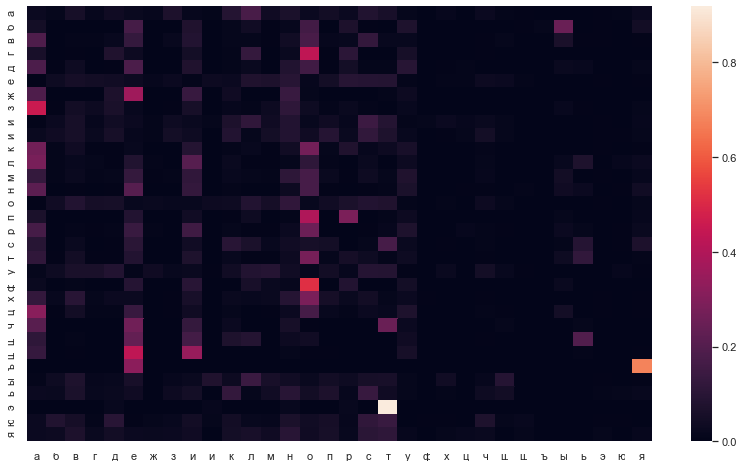

In [63]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [66]:
len(set(text.split(' ')))

7718

In [67]:
unique_words = list(set(text.split(' ')))
unique_words[:10]

['',
 'ничего,\nпотом',
 'левую',
 'подвергнуть',
 'ее,',
 'лесу.\n',
 'музыке',
 "обидчивые!''\n",
 'поодаль,',
 'не\nбыло']

In [68]:
del unique_words[0]

In [69]:
count_dict = {i:len(list(filter(lambda word: word[0] == i, unique_words))) for i in RUS}
count_dict

{'а': 106,
 'б': 265,
 'в': 606,
 'г': 263,
 'д': 394,
 'е': 83,
 'ж': 67,
 'з': 309,
 'и': 198,
 'й': 0,
 'к': 465,
 'л': 146,
 'м': 332,
 'н': 555,
 'о': 441,
 'п': 1095,
 'р': 275,
 'с': 850,
 'т': 306,
 'у': 277,
 'ф': 32,
 'х': 80,
 'ц': 23,
 'ч': 157,
 'ш': 73,
 'щ': 7,
 'ъ': 0,
 'ы': 0,
 'ь': 0,
 'э': 50,
 'ю': 6,
 'я': 51}

In [70]:
prob_array =  np.array(list(count_dict.values()))
prob_array

array([ 106,  265,  606,  263,  394,   83,   67,  309,  198,    0,  465,
        146,  332,  555,  441, 1095,  275,  850,  306,  277,   32,   80,
         23,  157,   73,    7,    0,    0,    0,   50,    6,   51])

In [71]:
prob_array = prob_array / np.sum(prob_array)

In [72]:
prob_array

array([0.01411076, 0.03527689, 0.08067093, 0.03501065, 0.05244941,
       0.01104899, 0.00891906, 0.04113419, 0.02635783, 0.        ,
       0.06190096, 0.01943557, 0.04419595, 0.07388179, 0.05870607,
       0.14576677, 0.03660809, 0.11315229, 0.04073482, 0.03687433,
       0.00425985, 0.01064963, 0.00306177, 0.02089989, 0.00971778,
       0.00093184, 0.        , 0.        , 0.        , 0.00665602,
       0.00079872, 0.00678914])

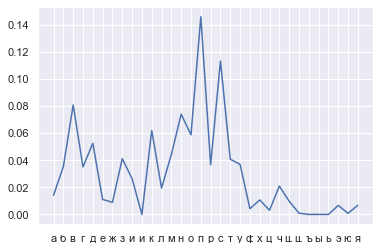

In [73]:
x = [x for x in RUS]
y = prob_array
plt.plot(x,y)

In [74]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUS)
for c in RUS:
    for m in RUS:
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[m]] * probabilities[POS[m], end]
        if proba > 0:
            print(''.join(['п', c, m, 'р']), proba)

паар 1.5165007863239659e-06
пабр 1.906781122217773e-06
павр 2.399953533693691e-06
пагр 3.750625774332759e-06
падр 3.889678128766586e-06
паер 4.876819026285369e-06
пажр 3.5260933393597896e-08
пазр 3.738037170766473e-06
паир 6.209223014466182e-07
пайр 5.228792283657147e-07
пакр 1.4317642441314408e-05
палр 3.164688210125784e-07
памр 5.225802198242332e-07
панр 4.637066079778823e-07
паор 3.7503899244859204e-06
папр 2.8197920712695675e-05
парр 2.7931470697143636e-08
паср 5.812108519897303e-07
патр 6.56720912773138e-06
паур 3.440930197332972e-07
пафр 2.4598698772200434e-07
пахр 6.897215121662876e-07
пацр 9.83219640043541e-09
пачр 6.504956673530074e-08
паэр 1.8899000276202775e-07
паюр 3.6123963231902735e-07
паяр 1.0985064842449958e-06
пгар 1.795322035401782e-08
пгбр 2.6135799103103013e-09
пгвр 1.4633703088804847e-09
пггр 1.3305844033030984e-09
пгдр 4.2287134381301896e-08
пгер 3.403038959451139e-08
пгзр 7.871513019342851e-10
пгир 9.04276275415828e-09
пгкр 6.488680313419876e-09
пглр 1.2490368339

In [93]:
s = []
start = RUS[1]
s.append(start)
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUS), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бывовсяп
